In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# read daily data
processed_dfs = []
for filename in sorted(os.listdir('data/aggregated_individual_data/')):
    with open('data/aggregated_individual_data/'+filename, 'r') as f: # open in readonly mode
        df = pd.read_csv(f)
        df.drop('Unnamed: 0', inplace=True, axis = 1)
        df['time'] = pd.to_datetime(df.loc[:,'time'])
        df.set_index(pd.DatetimeIndex(df['time'], freq = 'infer'), inplace=True)
        # df.drop('time', axis = 1, inplace=True)
        # print(df.index)
        # df.resample('1D', on= 'time')
        # print(df.dtypes)
        # df.interpolate(inplace= True)
        processed_dfs.append(df)

In [3]:
# read data per measurement
processed_dfs_measure = []
for filename in sorted(os.listdir('data/aggregated_individual_data_per_measurement/')):
    with open('data/aggregated_individual_data_per_measurement/'+filename, 'r') as f: # open in readonly mode
        df = pd.read_csv(f)
        df.drop('Unnamed: 0', inplace=True, axis = 1)
        processed_dfs_measure.append(df)

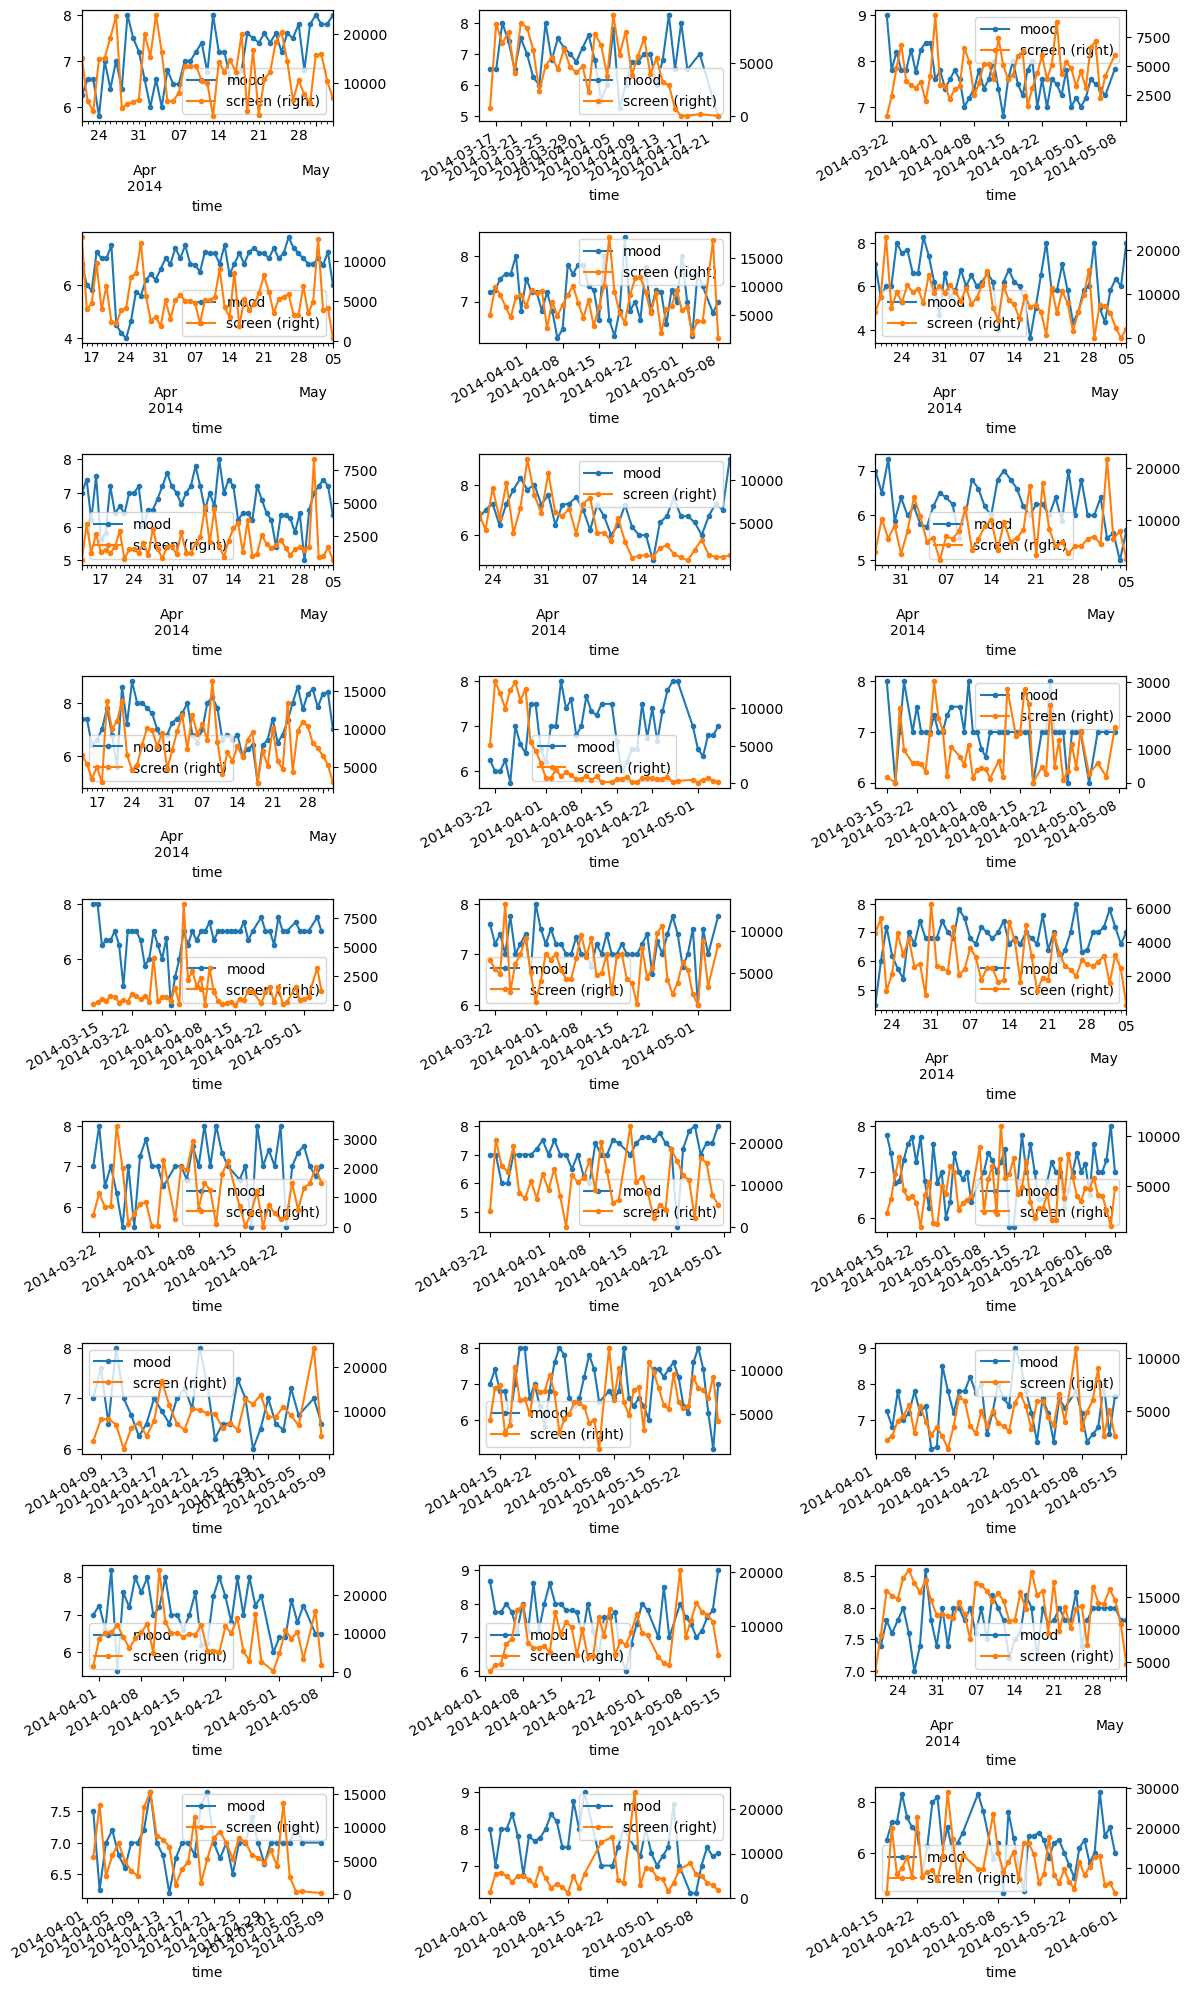

In [4]:
# plot some data
nrows = 9
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize = [12, 20])

counter = 0
for row in range(nrows):
    for col in range(ncols):
        processed_dfs[counter].plot(y='mood', use_index = True, ax = axes[row, col], marker = '.')
        processed_dfs[counter].plot(y='screen', use_index = True, ax = axes[row, col], secondary_y=True, marker = '.')
        counter += 1

        if counter >= len(processed_dfs):
            break
    if counter >= len(processed_dfs):
            break
    
plt.tight_layout()

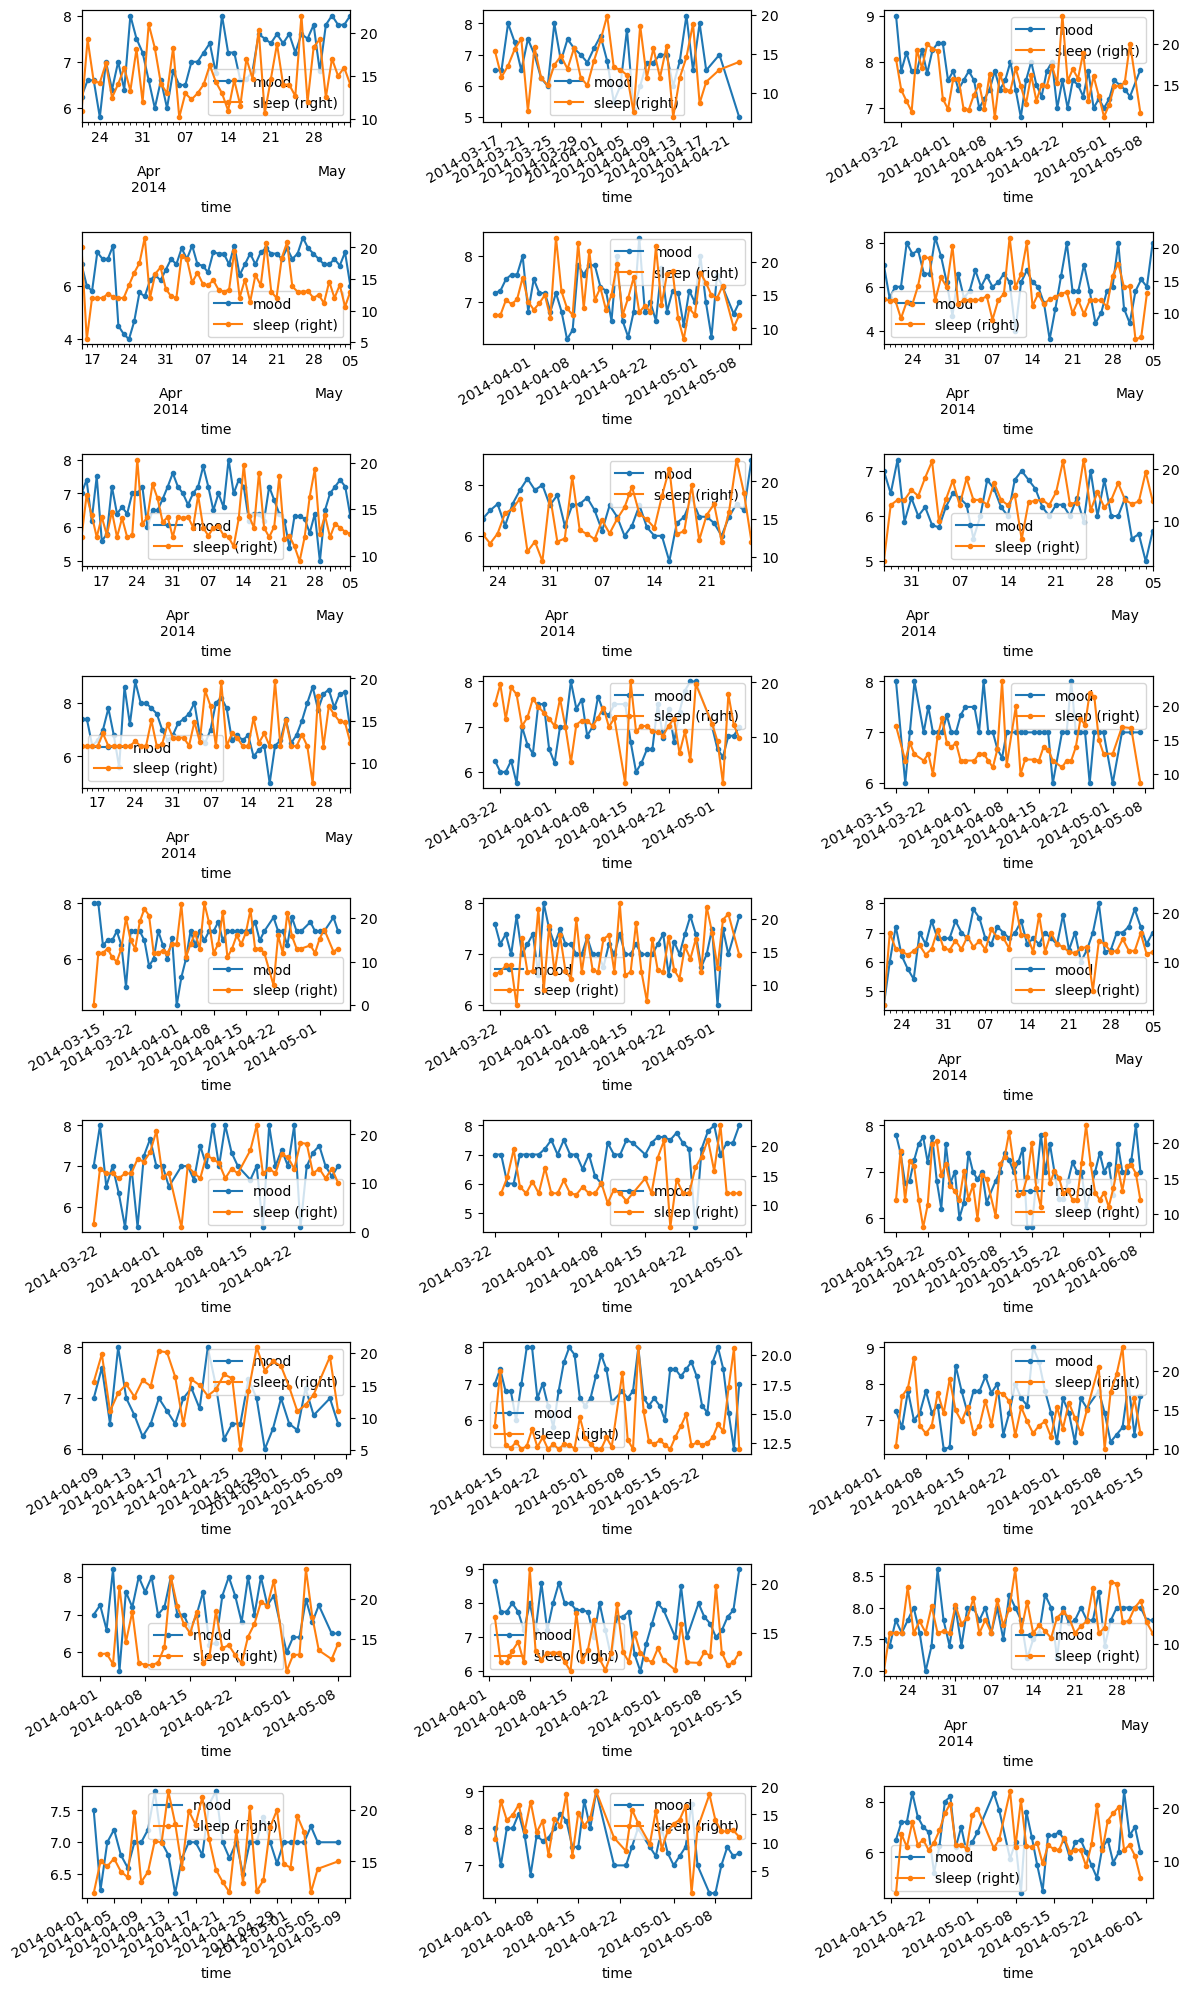

In [5]:
# plot some data
nrows = 9
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize = [12, 20])

counter = 0
for row in range(nrows):
    for col in range(ncols):
        processed_dfs[counter].plot(y='mood', use_index = True, ax = axes[row, col], marker = '.')
        processed_dfs[counter].plot(y='sleep', use_index = True, ax = axes[row, col], secondary_y=True, marker = '.')
        counter += 1

        if counter >= len(processed_dfs):
            break
    if counter >= len(processed_dfs):
            break
    
plt.tight_layout()

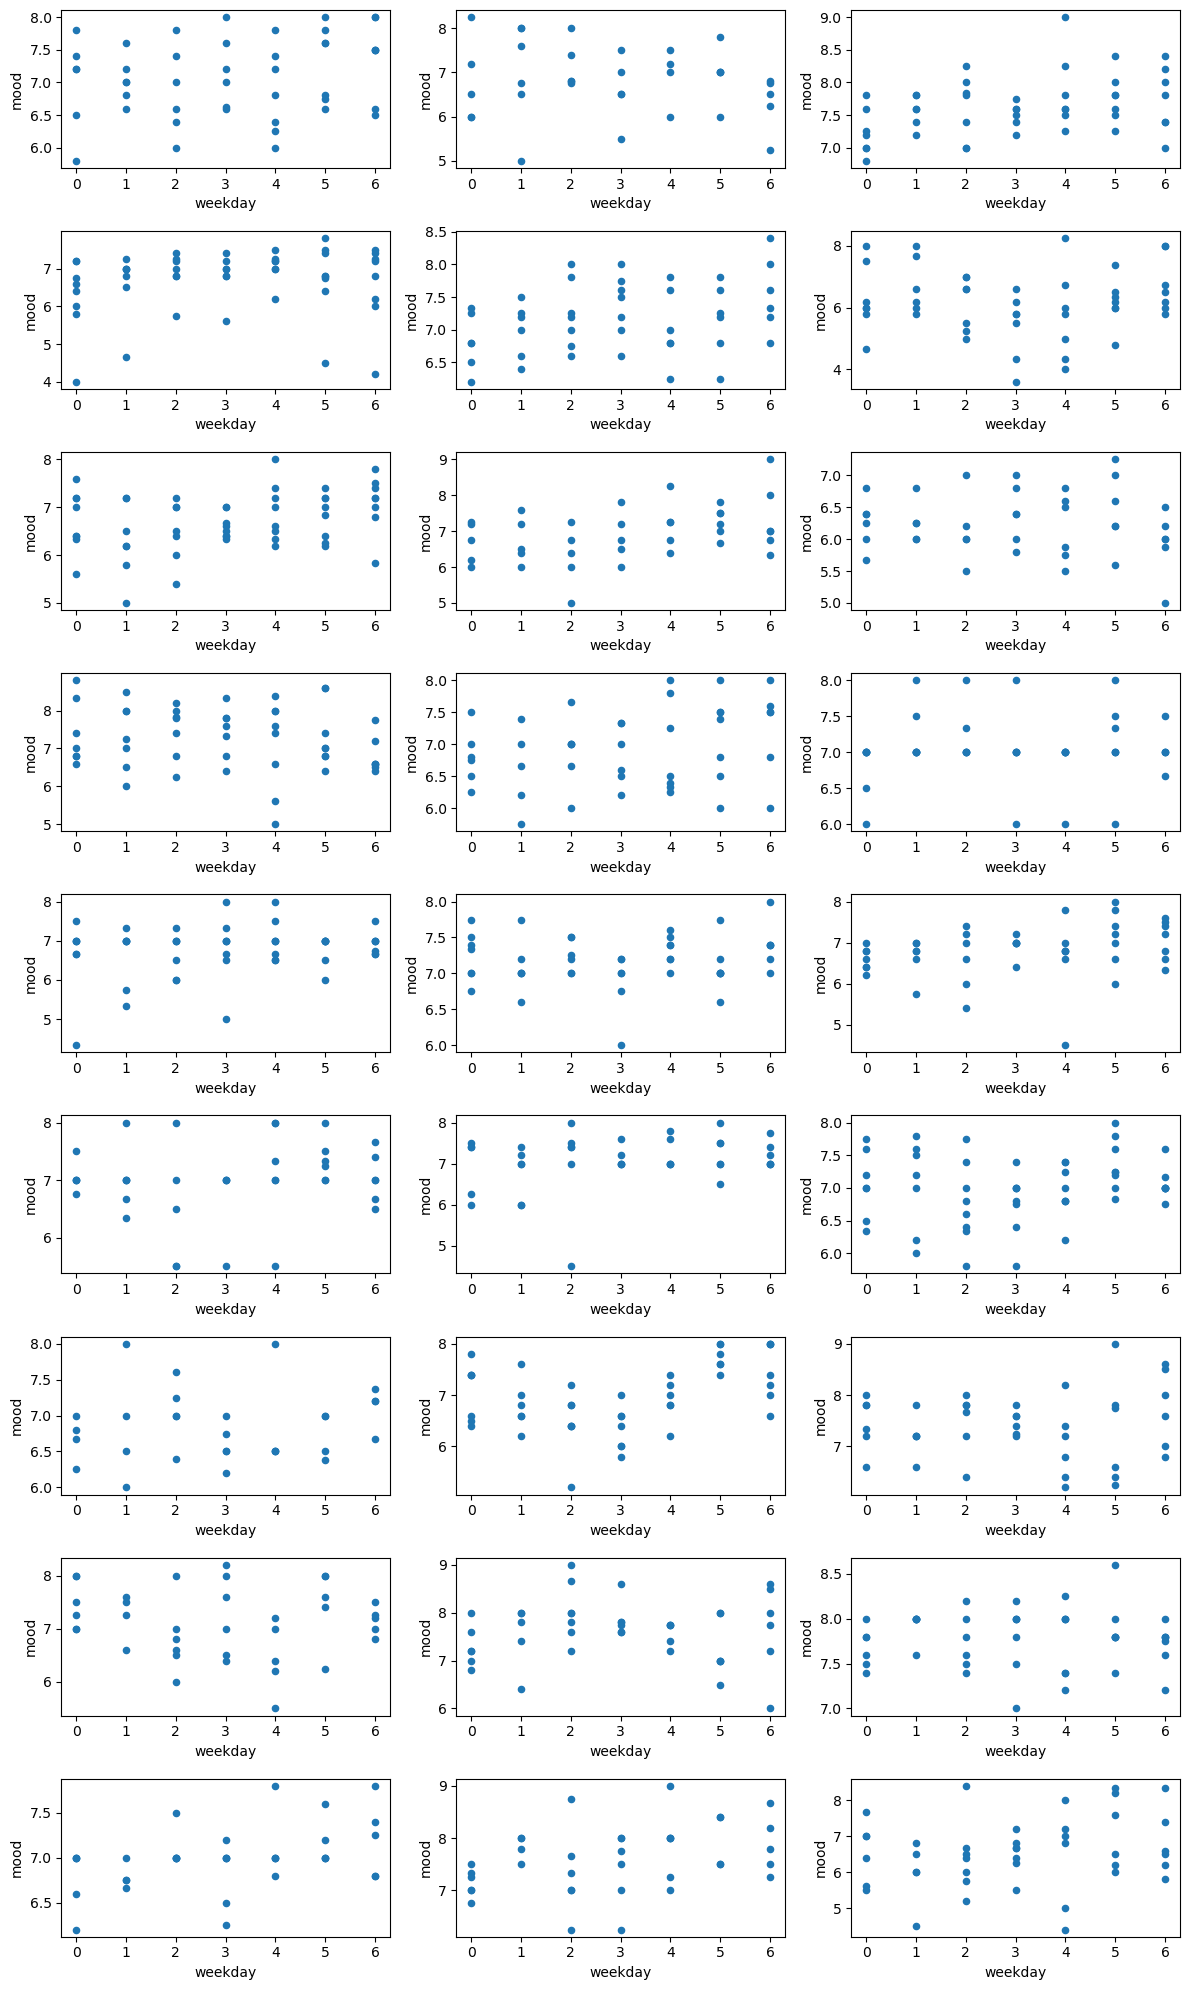

In [6]:
# plot some data
nrows = 9
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize = [12, 20])

counter = 0
for row in range(nrows):
    for col in range(ncols):
        processed_dfs[counter].plot.scatter('weekday', 'mood', ax = axes[row, col])
        #processed_dfs[counter].plot('date', 'screen', ax = axes[row, col], secondary_y=True)
        counter += 1

        if counter >= len(processed_dfs):
            break
    if counter >= len(processed_dfs):
            break
    
plt.tight_layout()

In [7]:
mood_weekday = np.empty([len(processed_dfs), 7])

for i, df in enumerate(processed_dfs):
    for j in range(7):
        mood_weekday[i, j] = df['mood'].loc[df['weekday'] == j].mean()

mood_weekday_all = np.mean(mood_weekday, axis = 0)
mood_weekday_all_std = np.std(mood_weekday, axis = 0)

In [8]:
processed_dfs[-1]

,time,weekday,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,sleep
time,,,,,,,,,,,,,,,,,,,,,
2014-04-16,2014-04-16,2,6.500000,0.000000,0.000000,0.183545,3603.304001,3.0,1.0,448.849,...,0.000,0.0,0.000,52.329,1863.521,0.000,0.000,164.932,NaN,3.889257
2014-04-17,2014-04-17,3,7.200000,-0.200000,1.200000,0.073303,20097.884002,2.0,0.0,2151.874,...,0.000,0.0,0.000,141.356,5646.824,0.000,0.000,283.445,NaN,15.028832
2014-04-18,2014-04-18,4,7.200000,-0.800000,0.800000,0.078501,8355.652001,3.0,1.0,1760.472,...,0.000,0.0,0.000,107.266,4976.865,0.000,0.000,102.369,NaN,12.635585
2014-04-19,2014-04-19,5,8.333333,0.000000,1.333333,0.292884,9845.454999,2.0,0.0,2881.785,...,0.000,0.0,0.000,25.198,3991.930,0.000,0.000,83.939,NaN,17.301044
2014-04-20,2014-04-20,6,7.400000,-0.200000,1.200000,0.091494,12707.177000,0.0,0.0,832.154,...,0.000,0.0,0.000,76.831,9363.352,0.000,0.000,3.010,NaN,13.000000
2014-04-21,2014-04-21,0,7.000000,-0.400000,0.600000,0.034450,7685.909000,0.0,0.0,577.835,...,0.000,0.0,0.000,57.471,6693.697,3.019,0.000,4.208,NaN,14.000000
2014-04-22,2014-04-22,1,6.800000,0.000000,0.200000,0.110949,22656.394999,7.0,0.0,3790.177,...,0.000,0.0,0.000,89.596,10234.044,52.436,0.000,90.132,NaN,12.026884
2014-04-23,2014-04-23,2,5.200000,-0.600000,-0.800000,0.010042,7725.315000,1.0,0.0,853.048,...,0.000,0.0,0.000,66.257,5340.479,0.000,0.000,0.000,NaN,13.458756
2014-04-24,2014-04-24,3,6.250000,-0.250000,0.750000,0.159772,8887.320000,5.0,1.0,3071.128,...,0.000,0.0,0.000,69.555,3268.422,42.677,0.000,90.989,NaN,15.756185


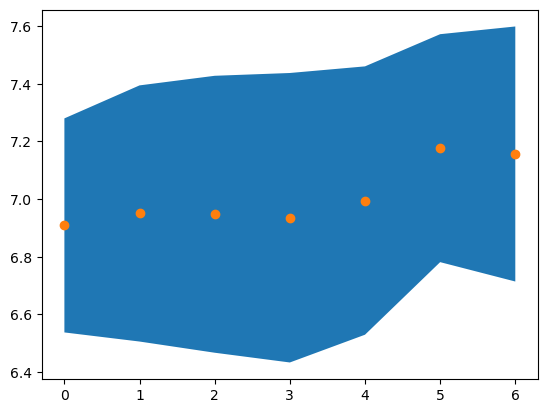

In [9]:
plt.fill_between(np.arange(0,7,1), mood_weekday_all-mood_weekday_all_std, mood_weekday_all+mood_weekday_all_std)
plt.scatter(np.arange(0,7,1),mood_weekday_all)

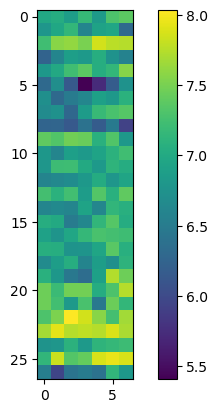

In [10]:
plt.imshow(mood_weekday)
plt.colorbar()

In [11]:
window = 5
for df in processed_dfs_measure:
    df['SMA_mood'] = df['mood'].rolling(window).mean()
    df['SMA_screen'] = df['screen'].rolling(window).mean()
    df['EWM_mood'] = df['mood'].ewm(span=window).mean()
    df['EWM_screen'] = df['screen'].ewm(span=window).mean()

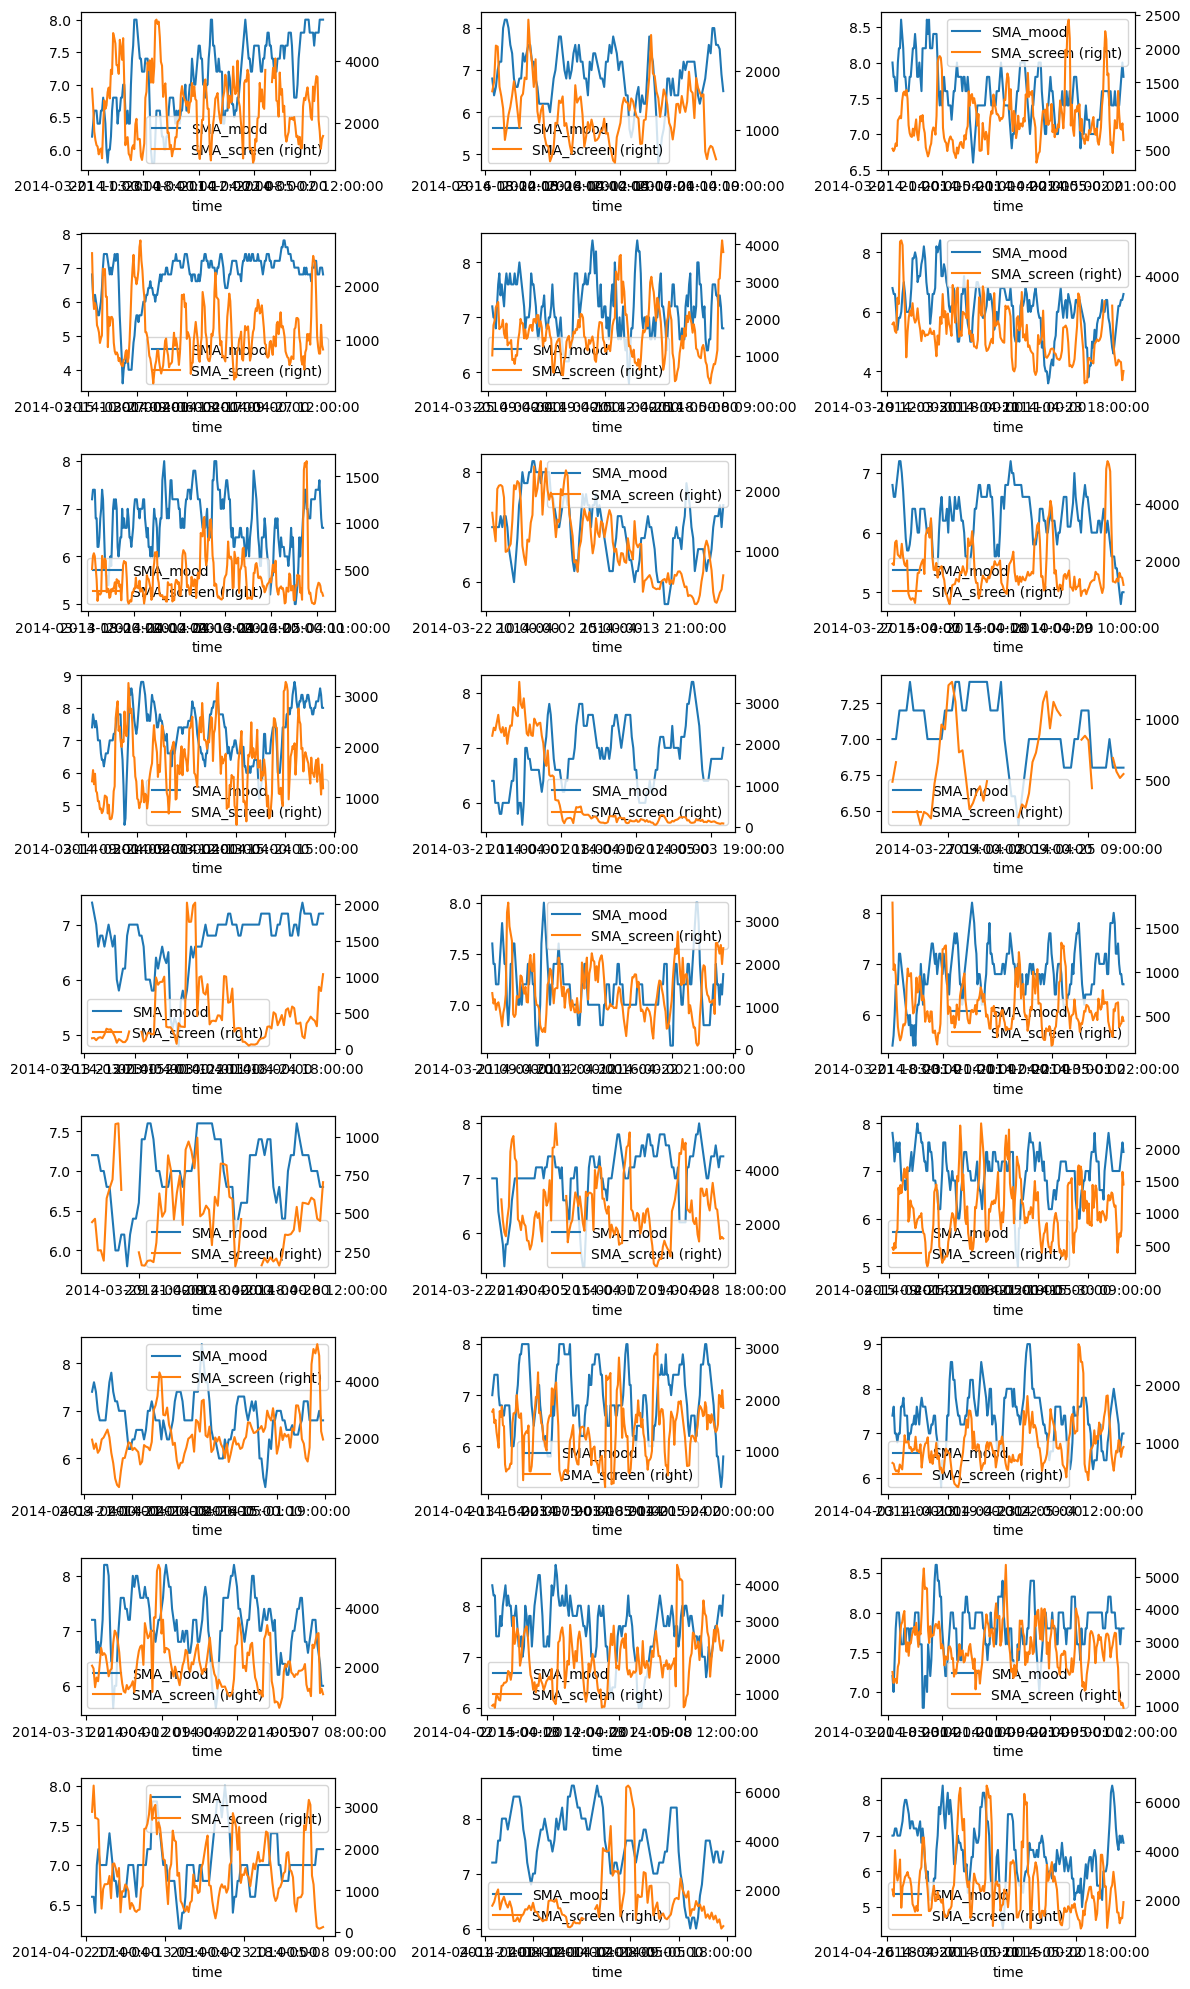

In [12]:
# plot some data
nrows = 9
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize = [12, 20])

counter = 0
for row in range(nrows):
    for col in range(ncols):
        processed_dfs_measure[counter].plot('time', 'SMA_mood', ax = axes[row, col])
        processed_dfs_measure[counter].plot('time', 'SMA_screen', ax = axes[row, col], secondary_y=True)
        # processed_dfs_measure[counter].plot('time', 'EWM_mood', ax = axes[row, col])
        # processed_dfs_measure[counter].plot('time', 'EWM_screen', ax = axes[row, col], secondary_y=True)
        counter += 1

        if counter >= len(processed_dfs):
            break
    if counter >= len(processed_dfs):
            break
    
plt.tight_layout()